# Elastic Net Regularization

Kurtis Gilliat, Joshua Higbee, Samuel Higbee, Jacob Lefler, Thomas Ottinger, Marshall Ringwood, Ben Smith, Spencer Vernon

# Introduction

Accurate out-of-sample prediction is the goal of machine learning algorithms.  These algorithms are designed to handle datasets with large numbers of variables, sometimes even more variables than observations.  Clearly, in such situations OLS is a poor choice for out-of-sample predictions.  After dropping the excess of variables over observations, OLS will perform horribly out-of-sample due to overfitting.  To overcome the problem of overfitting, many machine learning techniques use some sort of regularization to prevent the model from overfitting the training dataset.  LASSO and Ridge impose penalties on coefficients large in absolute value by constraining the vector $\hat{b}$ under the L-1 and L-2 norms.  In this notebook, we examine a third type of regularized linear regression -- the Elastic Net.

Elastic net is a regularized linear regression technique. Similar to LASSO and Ridge regression, this method is most effective when dealing with data that has many variables. While the information content of many variables is useful in machine learning, using too many variables can lead to overfitting. This results in estimates with high variance-- it predicts well in sample, but when tested with new data, the model will likely perform poorly because the model was overfitted to the training sample.

Elastic net solves this problem by employing a cost function that penalizes coefficients that are large in absolute value. Elastic net will minimize mean squared error plus the sum of the absolute values of the coefficients plus the sum of the squares of the coefficients, where we can choose how to weight the penalties of absolute values and squares of coefficients. This allows us to flexibly capture the regularization effects of both LASSO and Ridge regression. We examine the formal expression of the model in the Econometric Framework section.

This notebook will examine the theoretical and empirical literature surrounding Elastic Net, summarize the theoretical framework and define the Elastic Net estimator.  We then compare the performance of Elastic Net to other regression techniques using a Monte Carlo simulation.  We also perform similar comparisons using data from the NHIS and find that Elastic Net and Logistic Elastic Net outperform their non-regularized counterparts when predicting hospitalizations.  Finally, we summarize our findings and conclude.


# Literature Review

Elastic net was introduced by Zou & Hastie (2005) with the intent to overcome shortcomings of Lasso and Ridge. Lasso is often best, but it does have several shortcomings that Zou & Hastie address. For example, when there are more variables than observations in a test set, Lasso is not well-defined if the L1-norm is smaller than a certain value. Also, when two variables are highly correlated, Lasso randomly drops one. Furthermore, when there are more observations than variables in the training set, in the case where predictors are highly correlated, Ridge has been empirically shown to be better than Lasso. However, in other cases, Ridge is generally inferior to Lasso, especially because it has no power to drop variables. As the authors say about elastic net, “It is like a stretchable fishing net that retains all the ‘big fish.’”

Researchers have built many new models using elastic net. For example Wang, Zhu, Zou (2006) created a model called the “doubly regularized support vector machine” (DrSVM), which they show “can be particularly useful when the number of variables is much larger than the size of the training data.” They advocate their use of the elastic net penalty in the model because it: “performs automatic variable selection in a way similar to the L1 norm,” “encourages highly correlated variables to be selected or removed together,” and “can be particularly useful” when the number of variables is bigger than the training data set’s size. Additionally, Zhou et al. (2015) found that elastic net, like Lasso can be reduced to the Support Vector Machine (SVM) in only 11 lines of MATLAB. The purpose of SVM is to create a line (or hyperplane in high-dimensional data) that separates two classes in a data set.

In addition to theoretical literature, there are many empirical papers that employ Elastic Net to improve predictive results. Rutz et. al (2011) use a SVARX-TARCHX model with seasonal lags to forecast wind speed, wind direction, air pressure, and temperature using either lasso or elastic net in 6-8 minutes. The more conventional model—an ARFIMA-APARCH model (numerical estimates of “quasi” MLE)—takes more than 1 hour of computational time to forecast out of sample. Their SVARX-TARCHX model outperforms “naive benchmark”, the more basic VAR model, and the sophisticated AFIMA-APARCH model.  Thus, Elastic Net can outperform more computationally intensive models while significantly cutting down on computation time.

Li et. al (2015) use an “efficient kitchen-sink” regression conditioned on “economic fundamentals” (e.g. uncovered interest parity, PPP, the Taylor rule, etc.) to predict exchange rates. They use Elastic Net to dismiss uninformative predictors in out-of-sample prediction. Their model outperforms prediction models using either “standard forecast combinations” using OLS or even random walk.

Chen’s and Tindall’s work (2014) involves the econometric framework used to estimate returns from hedge funds. The typical literature in this field typically soes not use regularized regression. Predicting 6 different indexes, they consider two separate models, one with 22 risk factors as predictors, and the other with 27. In the case with 22 predictors, Elastic Net was the best method once, with LASSO performing best on 3. However, in case with 27 predictors, Elastic Net was best in three indexes and LASSO, Ridge, and dynamic regression were optimal in one each. However, since Elastic Net can be set to have an L1 ratio of 0 or 1, it can be guaranteed to perform at least as well as LASSO and Ridge and as shown in this paper, can sometimes do better.

# Econometric Framework

We begin with a basic OLS model specification:

$$y_i=x_i'\beta+\varepsilon_i$$
$$E[\varepsilon | X] =0$$

But rather than choose the OLS vector $\hat{b}$ that minimizes the sum of square residuals, we minimize the sum of square residuals plus the weighted absolute values and squares of coefficients:

$$\hat{b}=argmin_b \sum_{i=1}^n (y_i-x_i'b)^2 + \lambda_1\sum_{j=1}^k |b_j| + \lambda_2\sum_{j=1}^k (b_j)^2$$

This is a form of penalized least squares. Note that the $b_0$ term is not included in the penalties; thus, the constant term is not constrained in this problem. Let $\alpha = \frac{\lambda_2}{\lambda_1+\lambda_2}$.  Then our minimization problem is equivalent to

$$\hat{b}=argmin_b \sum_{i=1}^n (y_i-x_i'b)^2 \quad s.t. \quad (1-\alpha)\sum_{j=1}^k |b_j|+\alpha\sum_{j=1}^k (b_j)^2 \le k$$

Alternatively, in vector form we can write

$$\hat{b}= argmin_b (y - x_i'b - b_0)'(y - x_i'b - b_0) \quad s.t. \quad (1-\alpha)||b||_{L^1}+\alpha||b||_{L^2} \le k$$

where $k$ and $\alpha$ are hyperparameters chosen by cross-validation.  This means a correctly employed Elastic Net will test several models, using differing values of $k$ and $\alpha$, and choose the combination of hyperparameters that minimizes mean squared error when tested on a subset of the training data.  Generally, it is good practice to allow for an $\alpha$ of $0$ or $1$, meaning that the Elastic Net can be implemented as a Ridge or LASSO if it is optimal to do so.

It is also important to note that in the vector notation, the constant term $b_0$ is excluded from the vector $b$ so that the constant term is not penalized.

The generalized version we have derived above is called naive elastic net by the authors, and performs well only when close to ridge or elastic net.  It also tends to overshrink coefficients.  The authors correct for this by rescaling the naive elastic net coefficients by  $(1+\lambda_2)$ so that our estimates are

$$\hat{b}=(1+ \lambda_2)argmin_b \sum_{i=1}^n (y_i - x_i'b)^2 + \lambda_1 \sum_{j=1}^k | b_j| + \lambda_2\sum_{j=1}^k (b_j)^2$$

The rescaling step is necessary to account for the fact that both Lasso and Ridge are penalizing coefficients to reduce variance. While Elastic Net benefits from the flexibility of having both types of variance control, this results in overshrinking the coefficients.  Remember from Dr. Frandsen's derivation of the Ridge estimates that

$$\hat{b}^{ridge}=(X'X+\lambda_2I)^{-1}X'Y$$

Where $\lambda_2$ is some penalty.  Note that this is similar to $\frac{1}{1+\lambda_2}$ times a re-scaled version of the $(X'X)^{-1}$ matrix.  This shrinkage factor is necessary for Ridge to control variance, but since Elastic Net uses the LASSO variable elimination, this shrinkage step is unnescessary for Elastic Net estimates and we re-scale the estimator by multiplying by $(1 + \lambda_2)$.
 


# Simulations

A model to illustrate Elastic Net via the Monte Carlo Method is a multiple regression with dependent variable $y$, independent variables comprising $x$, unknown parameters comprising $\beta$, and an error term $\varepsilon$

$$y_i=x_i'\beta+\varepsilon_i$$

For the purposes of Monte Carlo simulation, values for $y$ will be calculated using known parameters of $\beta$ that are as follows:

$$\beta = (10, 10, 5, 5, 1, ._{98}., 1, 0, ._{394}., 0)^T$$

The number of predictors and number of observations are as follows:

$$p = 500$$
$$n = 200$$

Predictors will be correlated as follows:

$$Cov(X)_{ij} = (0.7)^{|i-j|}$$

The means of the multivariate normal distribution from which $X$ will be sampled are all $0$. The error term follows a normal distribution with a mean of $0$ and a variance of $1$.
This model provides a series of problems for normal (OLS) estimation. First, the number of predictors is greater than the number of observations, so OLS can't proceed without losing some of the predictors. Second, the number of predictors will still be high if OLS removes predictors until it can function, and many of those predictors have no effect on $y$. Third, the predictors are correlated with each other.

To solve these problems, LASSO can do variable selection to reduce the problems involved with a high number of noisy predictors, and Ridge can reduce the penalties of multicollinearity with variable shrinkage. Elastic Net allows us to gain some of the advantages of both.

In [37]:
# Import useful tools
import numpy
import math
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Generate our dataset with appropriate correlations
numpy.random.seed(12)
def xxCov(a, b):
    return math.pow(0.7, abs(a-b))
n = 200
p = 500
A = range(1, p + 1)
B = range(1, p + 1)
r = numpy.zeros((len(A),len(B)))
for i in range(len(A)):
    for j in range(len(B)):
        r[i,j] = xxCov(A[i], B[j])

beta = [10, 10, 5, 5]
beta.extend(numpy.ones(100))
beta.extend(numpy.zeros(p - len(beta)))
runs = 100

# Fit and run several models to compare
mseEl = []
mseReg = []
bCoefs = []
lambdas = [.9, 1]
for i in range(0, runs):
    x = numpy.random.multivariate_normal([0] * p, r, n)
    y = []
    for j in range(0, n):
        y.append(sum([a*b for a,b in zip(beta,x[j])]) + sum(numpy.random.normal(0, 1, 1)))
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)    
    mseElParts = []
    bParts = []
    
    reg = ElasticNetCV(alphas=numpy.arange(0.01, 0.1, 0.01), cv=5, fit_intercept=True, l1_ratio=0)
    reg.fit(x_train, y_train)
    mseElParts.append(numpy.mean((y_test - reg.predict(x_test)) ** 2))
    bParts.append(reg.coef_)
    
    for j in lambdas:
        reg = ElasticNetCV(cv=5, fit_intercept=True, l1_ratio=j)
        reg.fit(x_train, y_train)
        mseElParts.append(numpy.mean((y_test - reg.predict(x_test)) ** 2))
        bParts.append(reg.coef_)
        
        
    mseEl.append(mseElParts)
    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    ols = sm.OLS(y_train, x_train)
    results = ols.fit()
    bParts.append(results.params)
    bCoefs.append(bParts)
    mseReg.append(numpy.mean((y_test - results.predict(x_test)) ** 2))

In [39]:
print("Mean and Standard Deviation for MSE of Ridge Regression")
print("Mean:", numpy.mean([item[0] for item in mseEl]), "Standard Deviation:", numpy.std([item[0] for item in mseEl]), "\n")
for i in range(0, len(lambdas) - 1):
    print("Mean and Standard Deviation for MSE of Elastic Net with lambda of", lambdas[i])
    print("Mean:", numpy.mean([item[i + 1] for item in mseEl]), "Standard Deviation:", numpy.std([item[i + 1] for item in mseEl]), "\n")
print("Mean and Standard Deviation for MSE of LASSO Regression")
print("Mean:", numpy.mean([item[len(lambdas)] for item in mseEl]), "Standard Deviation:", numpy.std([item[len(lambdas)] for item in mseEl]), "\n")
print("Mean and Standard Deviation for MSE of OLS")
print("Mean:", numpy.mean(mseReg), "Standard Deviation:", numpy.std(mseReg))

Mean and Standard Deviation for MSE of Ridge Regression
Mean: 221.921118111 Standard Deviation: 53.7774189043 

Mean and Standard Deviation for MSE of Elastic Net with lambda of 0.9
Mean: 26.8362441263 Standard Deviation: 10.5189966355 

Mean and Standard Deviation for MSE of LASSO Regression
Mean: 31.9794167539 Standard Deviation: 11.289221942 

Mean and Standard Deviation for MSE of OLS
Mean: 223.259179098 Standard Deviation: 52.4275237001


In [45]:
import matplotlib.pyplot as plt
#plt.hist([item[len(lambdas)] for item in mseEl])
#plt.show()
countElastic = 0
countLASSO = 0
for i in range(0, p):
    if abs(numpy.mean([item[1][i] for item in bCoefs]) - beta[i]) > abs(numpy.mean([item[2][i] for item in bCoefs]) - beta[i]):
        countLASSO = countLASSO + 1
    else:
        countElastic = countElastic + 1

print("Elastic Net's mean of coefficients across", runs, 
    "runs differs less absolutely from the true beta value for", countElastic,
    "coefficients out of", str(p), "LASSO's averages are only better for", countLASSO, "coefficients.")
    

Elastic Net's mean of coefficients across 100 runs differs less absolutely from the true beta value for 275 coefficients out of 500 LASSO's averages are only better for 225 coefficients.


We see that in our simulation, Ridge and OLS perform particularly poorly.  This is unsurprising because neither model is capable of selecting subsets of variables, meaning both will overfit while penalizing small coefficients that Ridge cannot eliminate from the model.  LASSO and Elastic Net perform much better, with Elastic Net slightly improving on LASSO.  This is a demonstration of the ability of Elastic Net to make small adjustments to the "size" of the net through additional Ridge regularization.

# Empirical Example - NHIS Hospitalization Prediction

Our empirical application will predict hospitaliations from NHIS data from 1997-2001.  Much like a real-world application of machine learning methods, we will use past data to predict future results; in partiucular, we calibrate an Elastic Net model on data from 1997-2000 and use this model to predict 2001 hopsitalizations.  We employ both a linear Elastic Net and a Logistic Elastic Net, which regularizes coefficients in the same way but utilizes a logistic regression framework to classify a binary outcome.  We compare both of these Elastic Net models to predictions made by OLS and Logistic regression (non-regularized) and find that Elastic Net outperforms both models, while soetimes choosing hyperparameters that make the Elastic Net identical to either LASSO or Ridge regression.


## Description of the Data and Setting

For this project, we used NHIS data from 1997-2001 downloaded from the IPUMS website. In addition, we had access to estimated levels of ambient fine particulate matter (PM2.5) for  Metropolitan Statistical Areas (MSAs) across the United States. These pollution data are the same as used by Pope et al. in “Mortality risk and PM2.5 air pollution in the USA: an analysis of a national prospective cohort”. These pollution estimates were then merged with NHIS data using MSAs as the common variable. Therefore, our sample population only includes individuals living in MSAs. Our training dataset consisted of observations from 1997-2000, and our test dataset was composed of individuals from 2001. The outcome variable was a binary indicator for whether or not an individual was hospitalized in the past 12 months. Our model predicted this outcome based on variables for age, race/ethnicity, income, education, gender, BMI, smoking status, ambient PM2.5, marital status, employment status, employment sector, hours worked, and health status, as well as the squared terms for continuous variables. We were also able to link individuals to pollution exposure estimates based on the MSA the individual lived in at the time of the survey.

#### Dataset Preparation

This NHIS dataset has already been partially compiled in SAS - we continue to prepare it for use in Python, and begin by importing useful packages and functions:

In [46]:
# Import useful tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import sklearn
import missingno as msno
from pandas.api.types import is_string_dtype

# Import modeling tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV as CV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor as OLS
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import ElasticNetCV as encv
from sklearn.linear_model import ElasticNet as ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error, confusion_matrix

# Set settings for notebook
sns.set(style = 'ticks', palette='Set2')
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)

We now import our data:

In [47]:
# Import data
df = pd.read_csv('ProjectData.csv')
print(df.shape)
df.head()

(500699, 120)


,YEAR,SERIAL,STRATA,PSU,NHISHID,HHWEIGHT,NHISPID,HHX,FMX,PX,PERWEIGHT,SAMPWEIGHT,FWEIGHT,ASTATFLG,CSTATFLG,PERNUM,AGE,COHABMARST,COHABEVMAR,BIRTHMO,BIRTHYR,FAMSIZE,FAMKIDNO,FAMOLDNO,HISPETH,EDUCREC2,EDUCREC1,HEADSTAREV,HEADSTARNOW,IND1995,POVERTY,CEREBPALEV,ALCAMT,ALCDAYSWK,BLOODGAVYR,AIDTEV,MORTDODQ,MORTDODY,MORTUCODLD,MORTWT,gend,region_new,livingqtr_new,married_binary,ever_married,legal_marital_status,current_marital_status,marital_status,race,yrs_in_us,hisp_eth,born_in_us,us_citizen,armed_forces,honorable_discharge,education,employed,hosp_binary,hosp_times,hosp_days,occupation,hrswrkd,working_class,poor,income,home_owner,subsidized_rent,health_status,height_inches,weight_lbs,bmi,bedrest,school_days_lost,work_days_lost,pregnant,has_add,has_anemia,has_arthritis,has_asthma,has_autism,is_blind,ever_had_cancer,has_cerebral_palsy,has_coronary_heart_disease,has_congenital_heart_disease,ever_had_chickenpox,ever_had_cystic_fibrosis,has_diabetes,has_down_syndrome,has_ear_infections,had_heart_attack,has_heart_condition,has_hypertension,has_weak_kidneys,has_liver_condition,has_respiratory_allergy,has_retardation,had_seizure,has_sickle_cell,had_stroke,had_ulcer,has_vision_prob,had_asthma_attack,has_asthma_in_er,age_at_diabetes,takes_insulin,takes_diabetic_pills,days_with_alcohol,has_smoked,smoking_age,days_smkd_per_month,cigs_per_day,num_of_10_min_activity,at_risk_for_aids,gave_blood,mortality,cause_of_death,PUBLICID,pm,age_buckets
0,1997,8,5142,2,1997000308,1760,19970003080101,308,1,1,1973,4316,1859,1,0,1,33,0,0,11,1963,4,2,0,62,41,10,0,0,1920,13,0,0,96,0,2,9,9999,96,2143,Female,West,House/Apartment,Yes,Yes,Married,Married,Married,White,10 to 15 years,Yes,NaN,NaN,No,No,Less than High School,Employed,No,NaN,NaN,Service Occupation,38.0,Private Company,Yes,Less than $35K,No,NaN,Excellent,64.0,115.0,19.7,3.0,NaN,5.0,No,NaN,NaN,NaN,No,NaN,NaN,No,NaN,No,NaN,NaN,NaN,No,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0,NaN,NaN,0.0,No,No,Alive,Other,19970003080101,1.733196,3. ages 30-34
1,1997,8,5142,2,1997000308,1760,19970003080102,308,1,2,2219,0,1859,3,0,2,36,0,0,11,1960,4,2,0,62,31,7,0,0,0,13,0,0,96,0,0,9,9999,96,2414,Male,West,House/Apartment,Yes,Yes,Married,Married,Married,White,NaN,Yes,NaN,NaN,No,No,Less than High School,Employed,No,NaN,NaN,NaN,25.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Alive,Other,19970003080102,1.733196,4. ages 35-39
2,1997,8,5142,2,1997000308,1760,19970003080103,308,1,3,1859,0,1859,0,3,3,12,0,0,6,1984,4,2,0,62,31,6,0,0,0,13,0,0,96,0,0,9,9999,96,0,Male,West,House/Apartment,No,No,NIU,NIU,Never Married,White,NaN,Yes,NaN,NaN,NaN,NaN,Less than High School,NaN,No,NaN,NaN,NaN,0.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Other,19970003080103,NaN,NaN
3,1997,8,5142,2,1997000308,1760,19970003080104,308,1,4,2128,4705,1859,0,1,4,4,0,0,7,1992,4,2,0,62,0,0,0,2,0,13,1,0,96,0,0,9,9999,96,0,Female,West,House/Apartment,No,No,NIU,NIU,Never Married,White,NaN,Yes,Yes,NaN,NaN,NaN,Less than High School,NaN,No,NaN,NaN,NaN,0.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,No,NaN,No,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Other,19970003080104,NaN,NaN
4,1997,9,5095,2,1997000309,1103,19970003090101,309,1,1,1391,0,1185,3,0,1,42,0,0,8,1954,2,0,0,21,32,9,0,0,0,32,0,0,96,0,0,3,1999,1,1523,Male,West,House/Apartment,Yes,Yes,Married,Married,Married,White,NaN,Yes,NaN,NaN,No,No,Less than High School,Employed,No,NaN,NaN,NaN,40.0,NaN,No,Less than $35K,Yes,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

At the moment, we have 120 variables.  We'll need to drop a few of them, as they include identification numbers and information that would be colinear with our variable of interest - a binary hospitalization variable.  Further cleaning is required, and we do that below:

In [48]:
# Drop unnecessary variables
df = df.drop(['SERIAL','STRATA', 'PSU', 'NHISHID', 'HHWEIGHT', 
                   'NHISPID', 'HHX', 'FMX', 'PX', 'PERWEIGHT', 
                   'SAMPWEIGHT', 'FWEIGHT', 'ASTATFLG', 'CSTATFLG',
                   'PERNUM', 'PUBLICID', 'COHABMARST', 'COHABEVMAR', 
                   'EDUCREC2', 'EDUCREC1', 'CEREBPALEV', 'MORTDODQ', 
                   'MORTDODY', 'MORTUCODLD', 'MORTWT', 'IND1995'], axis = 1)

# Edit variable of interest
df['hosp_days'] = np.where(df['hosp_binary']=='No', 0, df['hosp_days'])
df['hosp_times'] = np.where(df['hosp_binary']=='No', 0, df['hosp_times'])
tempdat = pd.get_dummies(df['hosp_binary'], prefix = 'hospitalized')
df = pd.concat([df, tempdat], axis = 1)
df.drop(['hosp_binary'], axis = 1)
df.head()

,YEAR,AGE,BIRTHMO,BIRTHYR,FAMSIZE,FAMKIDNO,FAMOLDNO,HISPETH,HEADSTAREV,HEADSTARNOW,POVERTY,ALCAMT,ALCDAYSWK,BLOODGAVYR,AIDTEV,gend,region_new,livingqtr_new,married_binary,ever_married,legal_marital_status,current_marital_status,marital_status,race,yrs_in_us,hisp_eth,born_in_us,us_citizen,armed_forces,honorable_discharge,education,employed,hosp_binary,hosp_times,hosp_days,occupation,hrswrkd,working_class,poor,income,home_owner,subsidized_rent,health_status,height_inches,weight_lbs,bmi,bedrest,school_days_lost,work_days_lost,pregnant,has_add,has_anemia,has_arthritis,has_asthma,has_autism,is_blind,ever_had_cancer,has_cerebral_palsy,has_coronary_heart_disease,has_congenital_heart_disease,ever_had_chickenpox,ever_had_cystic_fibrosis,has_diabetes,has_down_syndrome,has_ear_infections,had_heart_attack,has_heart_condition,has_hypertension,has_weak_kidneys,has_liver_condition,has_respiratory_allergy,has_retardation,had_seizure,has_sickle_cell,had_stroke,had_ulcer,has_vision_prob,had_asthma_attack,has_asthma_in_er,age_at_diabetes,takes_insulin,takes_diabetic_pills,days_with_alcohol,has_smoked,smoking_age,days_smkd_per_month,cigs_per_day,num_of_10_min_activity,at_risk_for_aids,gave_blood,mortality,cause_of_death,pm,age_buckets,hospitalized_No,hospitalized_Yes
0,1997,33,11,1963,4,2,0,62,0,0,13,0,96,0,2,Female,West,House/Apartment,Yes,Yes,Married,Married,Married,White,10 to 15 years,Yes,NaN,NaN,No,No,Less than High School,Employed,No,0.0,0.0,Service Occupation,38.0,Private Company,Yes,Less than $35K,No,NaN,Excellent,64.0,115.0,19.7,3.0,NaN,5.0,No,NaN,NaN,NaN,No,NaN,NaN,No,NaN,No,NaN,NaN,NaN,No,NaN,NaN,No,No,No,No,No,NaN,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0,NaN,NaN,0.0,No,No,Alive,Other,1.733196,3. ages 30-34,1,0
1,1997,36,11,1960,4,2,0,62,0,0,13,0,96,0,0,Male,West,House/Apartment,Yes,Yes,Married,Married,Married,White,NaN,Yes,NaN,NaN,No,No,Less than High School,Employed,No,0.0,0.0,NaN,25.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Alive,Other,1.733196,4. ages 35-39,1,0
2,1997,12,6,1984,4,2,0,62,0,0,13,0,96,0,0,Male,West,House/Apartment,No,No,NIU,NIU,Never Married,White,NaN,Yes,NaN,NaN,NaN,NaN,Less than High School,NaN,No,0.0,0.0,NaN,0.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Other,NaN,NaN,1,0
3,1997,4,7,1992,4,2,0,62,0,2,13,0,96,0,0,Female,West,House/Apartment,No,No,NIU,NIU,Never Married,White,NaN,Yes,Yes,NaN,NaN,NaN,Less than High School,NaN,No,0.0,0.0,NaN,0.0,NaN,Yes,Less than $35K,No,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,NaN,NaN,No,NaN,No,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Other,NaN,NaN,1,0
4,1997,42,8,1954,2,0,0,21,0,0,32,0,96,0,0,Male,West,House/Apartment,Yes,Yes,Married,Married,Married,White,NaN,Yes,NaN,NaN,No,No,Less than High School,Employed,No,0.0,0.0,NaN,40.0,NaN,No,Less than $35K,Yes,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,Dead,Heart Disease,1.733196,5. ages 40-44,1,0


Below, we visualize our missing data - it is clear that we need to do some editing, which will follow:

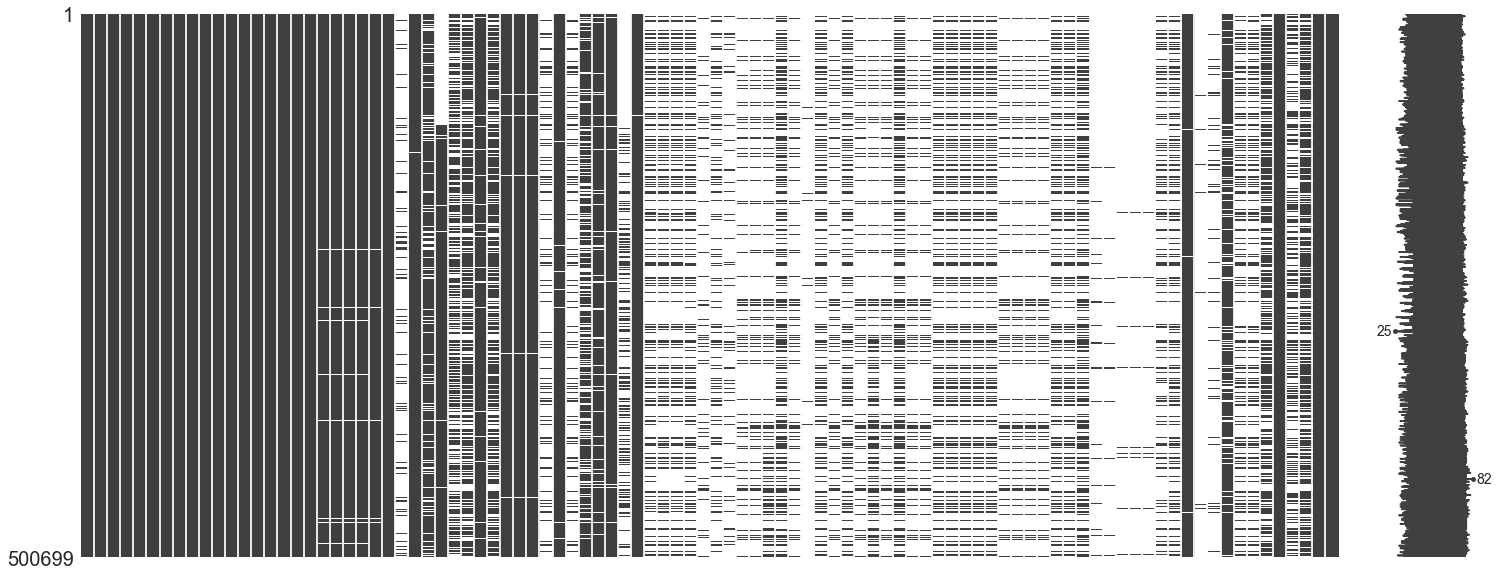

In [49]:
# Visualize missing data
msno.matrix(df)

In [50]:
# Drop health conditions highly correlated with (possibly resulting from) hospitalization
health_conditions = ['has_anemia', 'ever_had_cancer', 'has_cerebral_palsy', 'ever_had_cystic_fibrosis',
                    'has_down_syndrome', 'has_ear_infections', 'had_heart_attack', 'has_weak_kidneys', 
                    'has_liver_condition', 'has_respiratory_allergy', 'had_seizure', 'has_sickle_cell',
                    'had_stroke', 'had_ulcer', 'had_asthma_attack', 'has_asthma_in_er',
                    'mortality', 'has_arthritis', 'has_asthma', 'has_autism', 'is_blind', 
                    'has_coronary_heart_disease', 'has_retardation',
                    'has_congenital_heart_disease', 'ever_had_chickenpox', 'has_diabetes',
                    'has_heart_condition', 'has_hypertension', 'has_vision_prob']
df = df.drop(health_conditions, 1)

too_easy = ['bedrest', 'school_days_lost', 'work_days_lost']
df = df.drop(too_easy, 1)

We proceed to clean variables for which there is missing data:

In [51]:
df.columns[df.isnull().any()]

Index(['married_binary', 'ever_married', 'legal_marital_status',
       'current_marital_status', 'marital_status', 'yrs_in_us', 'hisp_eth',
       'born_in_us', 'us_citizen', 'armed_forces', 'honorable_discharge',
       'education', 'employed', 'hosp_binary', 'hosp_times', 'hosp_days',
       'occupation', 'hrswrkd', 'working_class', 'poor', 'income',
       'home_owner', 'subsidized_rent', 'health_status', 'height_inches',
       'weight_lbs', 'bmi', 'pregnant', 'has_add', 'age_at_diabetes',
       'takes_insulin', 'takes_diabetic_pills', 'days_with_alcohol',
       'has_smoked', 'smoking_age', 'days_smkd_per_month', 'cigs_per_day',
       'num_of_10_min_activity', 'at_risk_for_aids', 'gave_blood', 'pm',
       'age_buckets'],
      dtype='object')

In [52]:
# Recode missing categorical variables
missing = ['married_binary', 'ever_married', 'legal_marital_status',
       'current_marital_status', 'marital_status', 'yrs_in_us', 'hisp_eth',
       'born_in_us', 'us_citizen', 'armed_forces', 'honorable_discharge',
       'education', 'employed', 'occupation', 'working_class', 'poor', 
       'income', 'home_owner', 'subsidized_rent', 'health_status',
       'pregnant', 'has_add', 'takes_insulin', 'takes_diabetic_pills',
       'has_smoked', 'at_risk_for_aids', 'gave_blood', 'age_buckets']

for var in missing:
    df[var] = df[var].fillna(value = "Missing")
    
# Loop through the list to create dummy variables for both dataframes
for var in missing:
    tempdat = pd.get_dummies(df[var], prefix = var)
    df = pd.concat([df, tempdat], axis = 1)
    
# Drop unnecessary variables
df = df.drop(missing, 1)

We now create dummy variables for all string-valued columns for which there is no missing data:

In [53]:
string_columns = []

for var in df.columns:
    if is_string_dtype(df[var]) == True:
        string_columns.append(var)
string_columns.remove('hosp_binary')

for var in string_columns:
    tempdat = pd.get_dummies(df[var], prefix = var)
    df = pd.concat([df, tempdat], axis = 1)
    
# Drop unnecessary variables
df = df.drop(string_columns, 1)

df.columns[df.isnull().any()]

Index(['hosp_binary', 'hosp_times', 'hosp_days', 'hrswrkd', 'height_inches',
       'weight_lbs', 'bmi', 'age_at_diabetes', 'days_with_alcohol',
       'smoking_age', 'days_smkd_per_month', 'cigs_per_day',
       'num_of_10_min_activity', 'pm'],
      dtype='object')

Given that many important variables (such as smoking data, weight, and bmi) are only reported for a subcohort of this data, we drop all observations with missing data for these variables.  We fill other important factors' missing values with zeroes where possible to overcome missing value problems generated by the nature of the survey (for example, we can safely say that someone who has never smoked has not smoked at all in the past month).

In [54]:
# Subcohort
df_sub = df

df_sub.hrswrkd = df_sub.hrswrkd.fillna(value = 0)
df_sub = df_sub[np.isfinite(df_sub['height_inches'])]
df_sub = df_sub[np.isfinite(df_sub['weight_lbs'])]
df_sub = df_sub[np.isfinite(df_sub['bmi'])]
df_sub.days_with_alcohol = df_sub.days_with_alcohol.fillna(value = 0)
df_sub['days_smkd_per_month'] = np.where(df_sub['has_smoked_No']==1, 0, df_sub['days_smkd_per_month'])
df_sub['cigs_per_day'] = np.where(df_sub['has_smoked_No']==1, 0, df_sub['cigs_per_day'])
df_sub = df_sub[np.isfinite(df_sub['days_smkd_per_month'])]
df_sub = df_sub[np.isfinite(df_sub['cigs_per_day'])]
df_sub.num_of_10_min_activity = df_sub.num_of_10_min_activity.fillna(value = 0)
df_sub = df_sub[np.isfinite(df_sub['pm'])]

df_sub = df_sub.drop(['age_at_diabetes', 'smoking_age'], axis = 1)

df_sub = df_sub[np.isfinite(df_sub['hosp_days'])]
df_sub = df_sub[np.isfinite(df_sub['hosp_times'])]
df_sub = df_sub.drop(['hosp_binary'], axis = 1)

print(df_sub.shape)

(46842, 186)


Again, we visualize our data to see if there are any missing values or string-valued features:

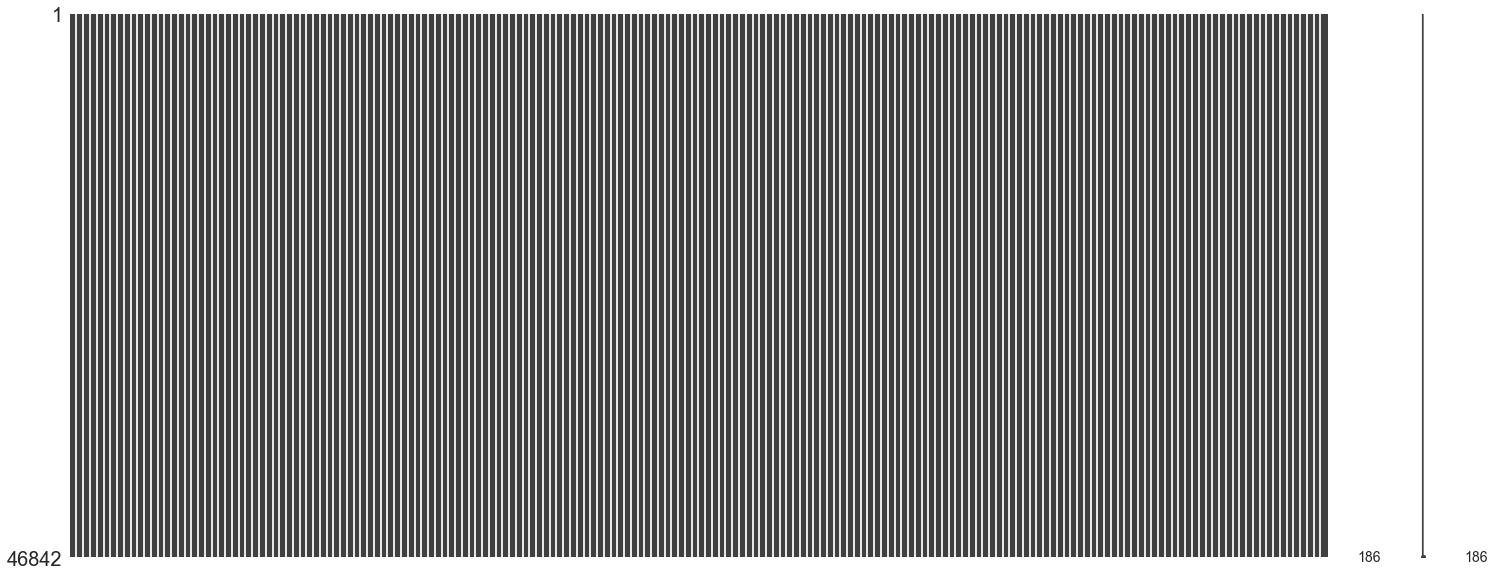

In [55]:
msno.matrix(df_sub)

In [56]:
df_sub.columns[df_sub.isnull().any()]

Index([], dtype='object')

In [57]:
string_columns_sub = []

for var in df_sub.columns:
    if is_string_dtype(df_sub[var]) == True:
        string_columns_sub.append(var)
        
print(string_columns_sub)

[]


We now proceed to the next step - preparing our dataset for analysis.

#### Preparing the Data for Machine Learning

We must first separate our training and testing data in order to use SciKit-Learn's machine learning packages.  We use data from 1997-2000 to predict outcomes for 2001, and also retrieve outcome variables from this dataset:

In [58]:
# Separate training and testing data
train = df_sub[df_sub['YEAR'] != 2001]
test = df_sub[df_sub['YEAR'] == 2001]

# Separate outcome variable
y_train_b = train['hospitalized_Yes']
y_train_c = train['hosp_days']
y_train_t = train['hosp_times']

y_test_b = test['hospitalized_Yes']
y_test_c = test['hosp_days']
y_test_t = test['hosp_times']

X_train = train.drop(['hosp_days', 'hosp_times', 'hospitalized_No'], axis = 1)
X_test = test.drop(['hosp_days', 'hosp_times', 'hospitalized_No'], axis = 1)

We can see basic summary statistics for our hospitalization data:

In [59]:
pd.DataFrame(y_train_b).describe()

,hospitalized_Yes
count,37151.000000
mean,0.084574
std,0.278250
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
X_train.describe()

,YEAR,AGE,BIRTHMO,BIRTHYR,FAMSIZE,FAMKIDNO,FAMOLDNO,HISPETH,HEADSTAREV,HEADSTARNOW,POVERTY,ALCAMT,ALCDAYSWK,BLOODGAVYR,AIDTEV,hrswrkd,height_inches,weight_lbs,bmi,days_with_alcohol,days_smkd_per_month,cigs_per_day,num_of_10_min_activity,pm,hospitalized_Yes,married_binary_Missing,married_binary_No,married_binary_Yes,ever_married_Missing,ever_married_No,ever_married_Yes,legal_marital_status_Divorced,legal_marital_status_Married,legal_marital_status_Missing,legal_marital_status_NIU,legal_marital_status_Never Married,legal_marital_status_Separated,legal_marital_status_Widowed,current_marital_status_Divorced,current_marital_status_Married,current_marital_status_Missing,current_marital_status_NIU,current_marital_status_Never Married,current_marital_status_Separated,current_marital_status_Widowed,marital_status_Divorced,marital_status_Living with Partner,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Separated,marital_status_Widowed,yrs_in_us_1 to 5 years,yrs_in_us_10 to 15 years,yrs_in_us_15 or more years,yrs_in_us_5 to 10 years,yrs_in_us_Less than 1 year,yrs_in_us_Missing,hisp_eth_Missing,hisp_eth_No,hisp_eth_Yes,born_in_us_Missing,born_in_us_Yes,us_citizen_Missing,us_citizen_No,us_citizen_Yes,armed_forces_Missing,armed_forces_No,armed_forces_Yes,honorable_discharge_Missing,honorable_discharge_No,honorable_discharge_Yes,education_College Graduate,education_High School,education_Less than High School,education_Missing,education_Post-Graduate Degree,education_Some College,employed_Employed,employed_Missing,employed_Not in Labor Force,employed_Unemployed,occupation_Architect,occupation_Artist/Athlete,occupation_Clerical Worker,occupation_Computer Scientist,occupation_Construction,occupation_Engineer,occupation_Farming,occupation_Forestry,occupation_Health Technician,occupation_Health Treatment,occupation_Machine Operator,occupation_Mail Carrier,occupation_Managerial Position,occupation_Mechanic,occupation_Military,occupation_Missing,occupation_Non-Health Technician,occupation_Production,occupation_Professional Specialty,occupation_Sales,occupation_Service Occupation,occupation_Teacher,working_class_Family Vusiness,working_class_Government Employee,working_class_Missing,working_class_Private Company,working_class_Self-Employed,poor_Missing,poor_No,poor_Yes,income_$20K or more,income_$35K to $75K,income_$75K or more,income_Less than $35K,income_Missing,home_owner_Missing,home_owner_No,home_owner_Yes,subsidized_rent_Missing,subsidized_rent_No,subsidized_rent_Yes,health_status_Excellent,health_status_Fair,health_status_Good,health_status_Missing,health_status_Poor,health_status_Very Good,pregnant_Missing,pregnant_No,pregnant_Yes,has_add_Missing,has_add_No,has_add_Yes,takes_insulin_Missing,takes_insulin_No,takes_insulin_Yes,takes_diabetic_pills_Missing,takes_diabetic_pills_No,takes_diabetic_pills_Yes,has_smoked_Missing,has_smoked_No,has_smoked_Yes,at_risk_for_aids_Missing,at_risk_for_aids_No,at_risk_for_aids_Yes,gave_blood_Missing,gave_blood_No,gave_blood_Yes,age_buckets_1. ages 18-24,age_buckets_10. ages 65-69,age_buckets_11. ages 70-74,age_buckets_12. ages 75-79,age_buckets_13. ages 80-84,age_buckets_2. ages 25-29,age_buckets_3. ages 30-34,age_buckets_4. ages 35-39,age_buckets_5. ages 40-44,age_buckets_6. ages 45-49,age_buckets_7. ages 50-54,age_buckets_8. ages 55-59,age_buckets_9. ages 60-64,age_buckets_Missing,gend_Female,gend_Male,region_new_Midwest,region_new_Northeast,region_new_South,region_new_West,livingqtr_new_Boarding House,livingqtr_new_Hotel/Motel,livingqtr_new_House/Apartment,livingqtr_new_Mobile Home,livingqtr_new_Other,livingqtr_new_Student Housing,livingqtr_new_Unknown,race_Black,race_Other,race_White,cause_of_death_Cancer,cause_of_death_Heart Disease,cause_of_death_Other
count,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.0,37151.0,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.000000,37151.0

## Data Visualization

We briefly examine our data to get a better idea of our population of interest:

Text(0.5,0,'BMI')

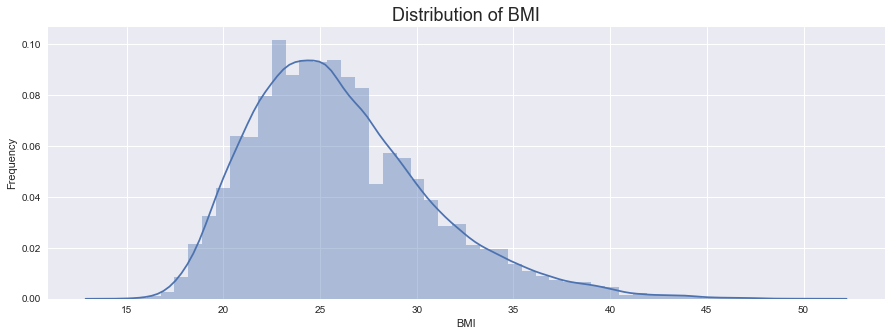

In [61]:
data = X_train['bmi']
f, ax = plt.subplots(figsize = (15,5))
ax.set_title("Distribution of BMI", fontsize = 18)
sns.distplot(data, ax = ax)
plt.ylabel("Frequency")
plt.xlabel("BMI")

Text(0.5,0,'Age')

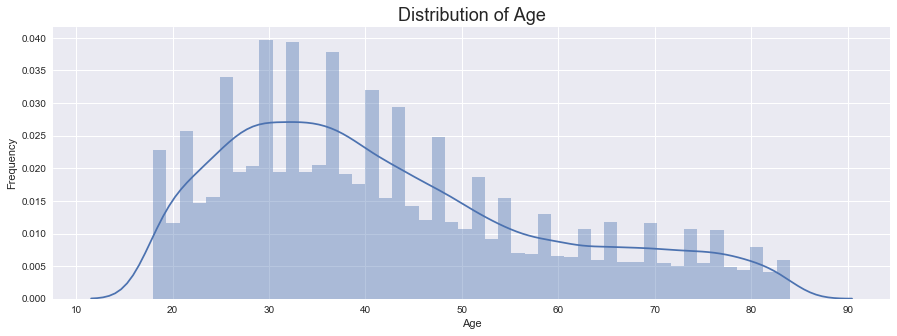

In [62]:
data = X_train['AGE']
f, ax = plt.subplots(figsize = (15,5))
ax.set_title("Distribution of Age", fontsize = 18)
sns.distplot(data, ax = ax)
plt.ylabel("Frequency")
plt.xlabel("Age")

Text(0.5,0,'Days Smoked per Month')

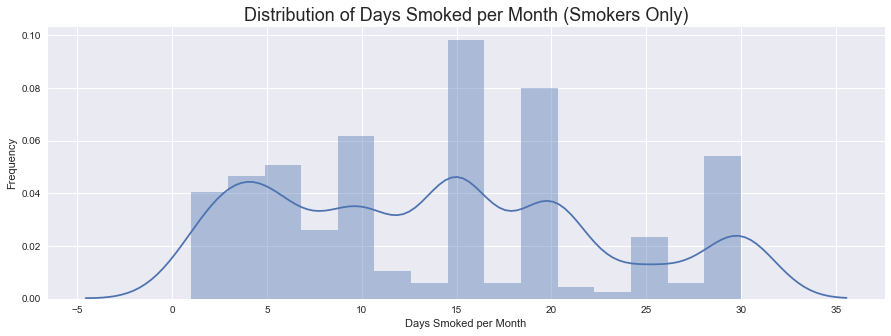

In [63]:
data = pd.DataFrame(X_train['days_smkd_per_month'])
data = data[data['days_smkd_per_month'] != 0]
f, ax = plt.subplots(figsize = (15,5))
ax.set_title("Distribution of Days Smoked per Month (Smokers Only)", fontsize = 18)
sns.distplot(data, ax = ax)
plt.ylabel("Frequency")
plt.xlabel("Days Smoked per Month")

Now we examine how hospitalization varies with BMI and age, using both linear and quadratic terms.  We note that hospitalization increases with both variables, and that when accounting for the quadratic term, there is also increased risk for lower ages and BMIs.

Text(0.5,1,'Hospitalization by BMI (Quadratic)')

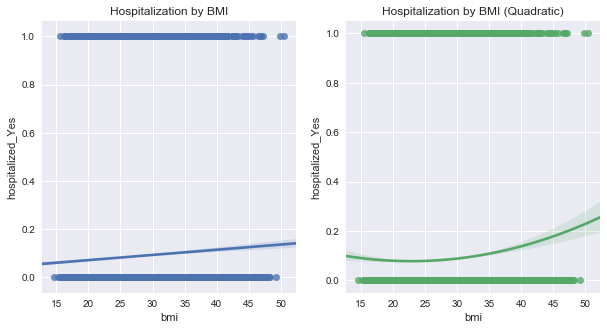

In [64]:
f, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.regplot(x = X_train['bmi'], y = y_train_b, ax = axis1)
axis1.set_title('Hospitalization by BMI')

sns.regplot(x = X_train['bmi'], y = y_train_b, order = 2, ax = axis2)
axis2.set_title('Hospitalization by BMI (Quadratic)')

Text(0.5,1,'Hospitalization by Age (Quadratic)')

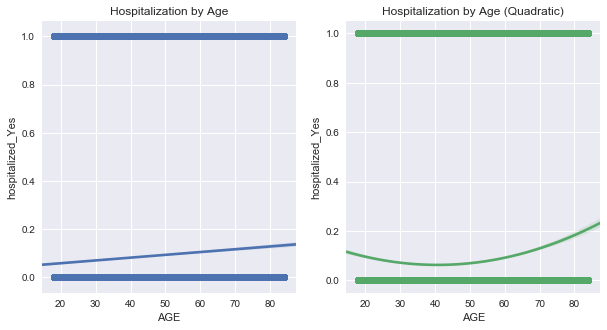

In [65]:
f, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.regplot(x = X_train['AGE'], y = y_train_b, ax = axis1)
axis1.set_title('Hospitalization by Age')

sns.regplot(x = X_train['AGE'], y = y_train_b, order = 2, ax = axis2)
axis2.set_title('Hospitalization by Age (Quadratic)')

We now add a few quadratic features to our model, for variables we would expect to not have a purerly linear effect.

In [66]:
X_train['weight_lbs2'] = np.square(X_train['weight_lbs'])
X_train['height_inches2'] = np.square(X_train['height_inches'])
X_train['bmi2'] = np.square(X_train['bmi'])
X_train['AGE2'] = np.square(X_train['AGE'])

X_test['weight_lbs2'] = np.square(X_test['weight_lbs'])
X_test['height_inches2'] = np.square(X_test['height_inches'])
X_test['bmi2'] = np.square(X_test['bmi'])
X_test['AGE2'] = np.square(X_test['AGE'])

We now create a smaller training set for use in some of our models, and put the finishing touches on our other datasets.

In [67]:
X_train_y = X_train[X_train['hospitalized_Yes'] == 1]
X_train_n = X_train[X_train['hospitalized_Yes'] != 1]
X_train_n_sub = X_train_n.sample(n = 3142)
Xtr_master = X_train_n_sub.append(X_train_y)

y_train_sub = Xtr_master['hospitalized_Yes']
X_train_sub = Xtr_master.drop(['hospitalized_Yes'], axis=1)
X_train = X_train.drop(['hospitalized_Yes'], axis = 1)
X_test = X_test.drop(['hospitalized_Yes'], axis = 1)

We'll now create scaled datasets by subtracting the mean and scaling to unit variance in order to optimally use Elastic Net regularization.

In [68]:
X_train_col = list(X_train.columns.values)
X_test_col = list(X_test.columns.values)
X_train_sub_col = list(X_train_sub.columns.values)

scaler = StandardScaler()
scaler.fit(X_train)
Xs_train = pd.DataFrame(scaler.transform(X_train), columns = X_train_col)
scaler.fit(X_test)
Xs_test = pd.DataFrame(scaler.transform(X_test), columns = X_test_col)
scaler.fit(X_train_sub)
Xs_train_sub = pd.DataFrame(scaler.transform(X_train_sub), columns = X_train_sub_col)

## Modeling and Results

### Linear Probability Model

We'll now start with a linear probability model - this clearly has drawbacks, such as the possibility that the model will yield predicted values that are less than 0 or greater than 1.  However, we begin with this model to more clearly demonstrate the strengths of the Elastic Net model.  We can more easily extract the coefficients from SciKit-Learn's functions, and see exactly how much better the elastic net performs.

For each model, we will graph the magnitudes of the ten most positive and the ten most negative coefficients, with training and testing MSEs shown above.  This provides a good idea of how each model performs.

We begin by estimating an OLS model with our scaled data, as shown below.

Train MSE: 30167123.561722696
Test MSE: 30166681.23971296


Text(0,0.5,'Important Factors')

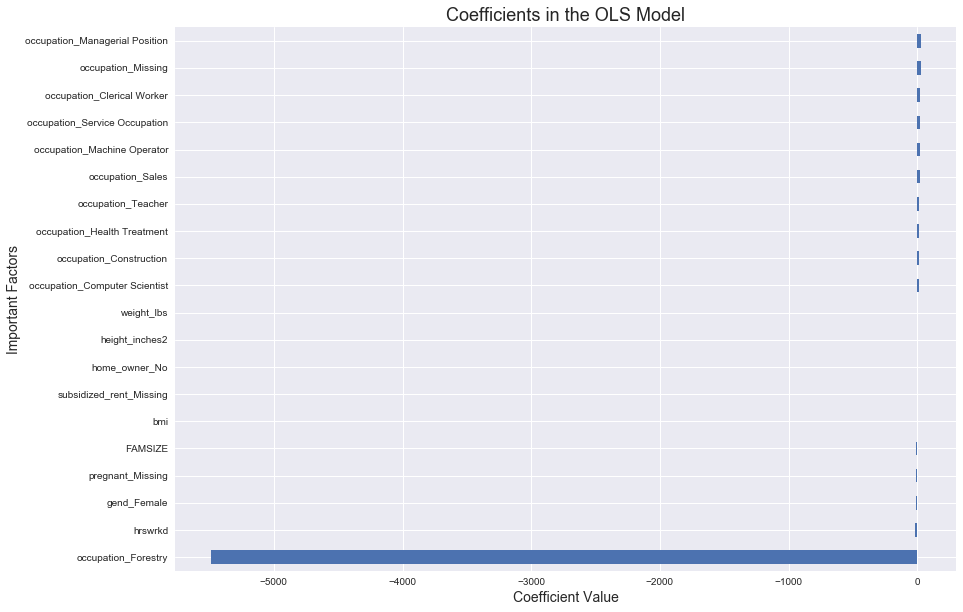

In [24]:
# Create model
ols = OLS(tol=.0001)

# Fit model
ols.fit(Xs_train, y_train_b)

# Prediction
train_predictions = ols.predict(Xs_train)
test_predictions = ols.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_b, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

# Show coefficients for elastic net (most predictive power)
coef = pd.Series(ols.coef_ , index = Xs_train.columns)
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
mpl.rcParams['figure.figsize'] = (14.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the OLS Model", fontsize = 18)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.ylabel("Important Factors", fontsize = 14)

We can instantly see that one variable, a dummy for workers in Forestry, has a massive size.  This is likely a result of scaling our data, and the predicted values for these workers is not likely to be so large, but it is still problematic.

We proceed to a linear model with Elastic Net regularization:

Train MSE: 0.0713992534815985
Test MSE: 0.07063225267187219


Text(0,0.5,'Important Factors')

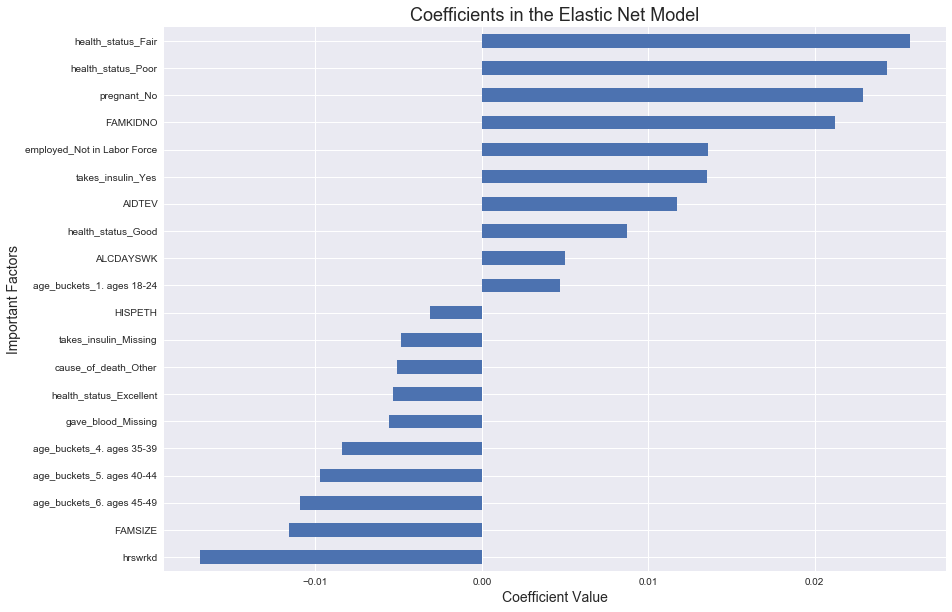

In [25]:
# Create model
clf = encv(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.01, .1, 1, 10])

# Fit model
clf.fit(Xs_train, y_train_b)

# Prediction
train_predictions = clf.predict(Xs_train)
test_predictions = clf.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_b, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

# Show coefficients for elastic net (most predictive power)
coef = pd.Series(clf.coef_ , index = Xs_train.columns)
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
mpl.rcParams['figure.figsize'] = (14.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model", fontsize = 18)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.ylabel("Important Factors", fontsize = 14)

We can instantly see that the MSE is drastically smaller for this model, even though we continue to use a linear probability model.  None of these coefficients is quite as large as before (note the scale of the axes - the other major OLS coefficients are significantly larger than those produced by the Elastic Net model).

We'll take another look at this model using unscaled data - this is less than ideal for the Elastic Net, but it may improve our OLS model (especially with the massive coefficient for people in Forestry).

Train MSE: 1.1097470151689917e+35
Test MSE: 1.1455319788120013e+35


Text(0,0.5,'Important Factors')

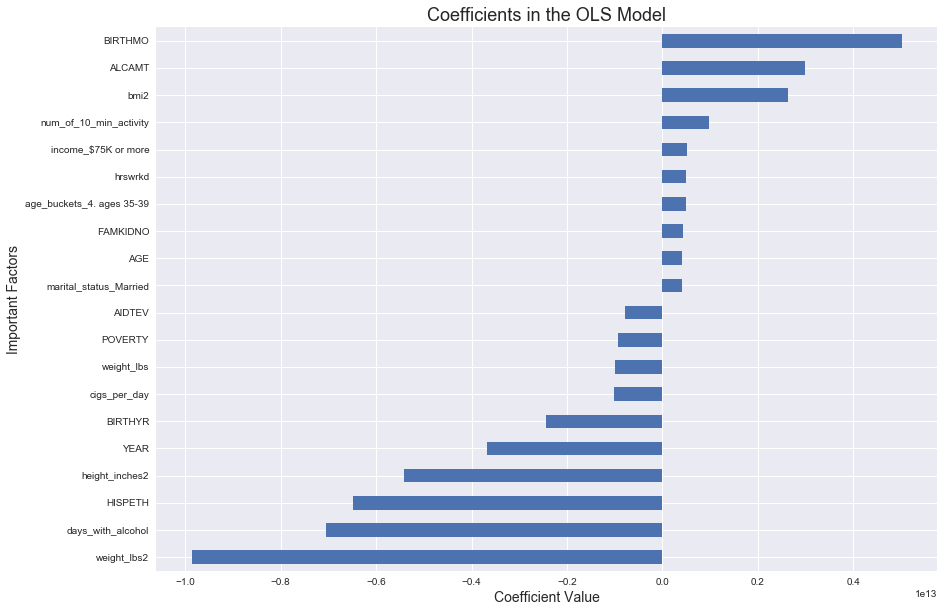

In [26]:
# Create model
ols = OLS(tol=.0001)

# Fit model
ols.fit(X_train, y_train_b)

# Prediction
train_predictions = ols.predict(X_train)
test_predictions = ols.predict(X_test)

# Report
print("Train MSE: {}".format(MSE(y_train_b, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

# Show coefficients for elastic net (most predictive power)
coef = pd.Series(ols.coef_ , index = X_train.columns)
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
mpl.rcParams['figure.figsize'] = (14.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the OLS Model", fontsize = 18)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.ylabel("Important Factors", fontsize = 14)

Note that while no coefficients in the OLS model with unscaled data are as massive as the Forestry coefficient in the OLS model with scaled data, the MSE is significantly higher for both the training and testing data.  

Train MSE: 0.07200054942137465
Test MSE: 0.07122016763437056


Text(0,0.5,'Important Factors')

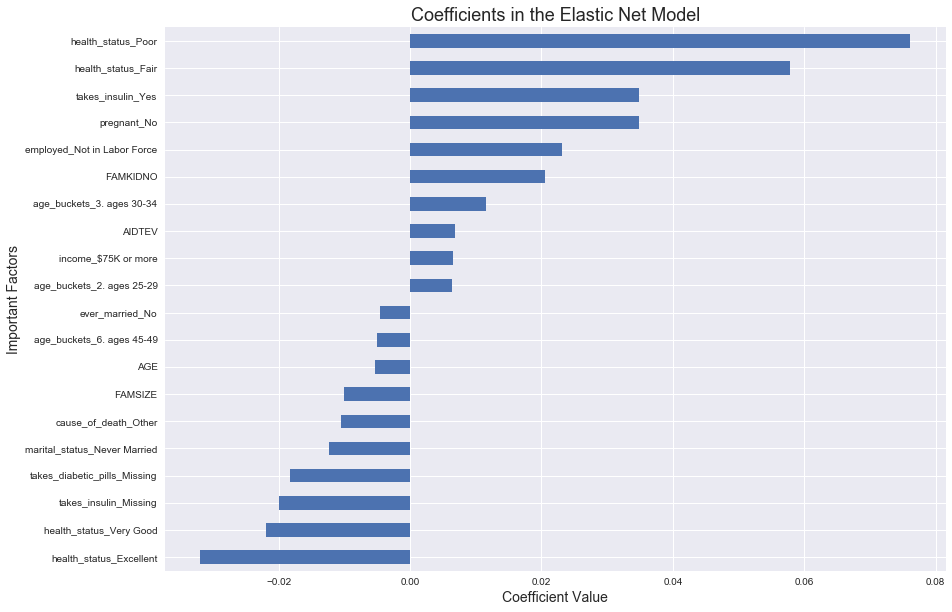

In [27]:
# Create model
clf = encv(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.01, .1, 1, 10])

# Fit model
clf.fit(X_train, y_train_b)

# Prediction
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Report
print("Train MSE: {}".format(MSE(y_train_b, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

# Show coefficients for elastic net (most predictive power)
coef = pd.Series(clf.coef_ , index = X_train.columns)
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
mpl.rcParams['figure.figsize'] = (14.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model", fontsize = 18)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.ylabel("Important Factors", fontsize = 14)

As before, the Elastic Net performs better than the OLS model.  While the Elastic Net performs similarly well with unscaled data, we can see that the MSE is marginally higher for both the training and testing data in the unscaled version.  This demonstrates the importance of scaling the data when using penalized regression techniques.

### Adjusting the L1 Ratio

We can see that SciKit-Learn's weight for the L1 (LASSO) and L2 (Ridge) parts of the penalty is set with the hyperparameter "l1_ratio".  We can now use the linear probability model and an iterated model to see how the results change with different values for this hyperparameter.

To demonstrate this, we will continue to use the linear probability model, and allow "l1_ratio" to range between 0.01 and 0.99, inclusive, in steps of 0.01.  We will then graph the Mean Squared Error from each penalized regression, for the testing and training data, to see how the model performs with different values.  We set alpha = 0.5, giving each model a constant regularization strength.

In [28]:
# Create an array with values 0.01-0.99
i = .01
ratios = []
while i < 1:
    ratios = np.append(ratios, [i], axis = 0)
    i = i + .01
    
pdratios = pd.DataFrame(ratios, columns = ['L1 Ratio'])

# Model and record MSEs for 
mses_train = []
mses_test = []
i = .01
while i < 1:
    # Fitting the model
    clf = encv(l1_ratio=[i], alphas=[.5], max_iter = 5000)
    clf.fit(X_train, y_train_b)
    
    train_predictions = clf.predict(X_train_sub)
    test_predictions = clf.predict(X_test)
    
    mses_train = np.append(mses_train, [format(MSE(y_train_sub, train_predictions))], axis = 0)
    mses_test = np.append(mses_test, [format(MSE(y_test_b, test_predictions))], axis = 0)
    i = i + .01
    
# Generate table of MSEs per l1_ratio
pdmses_train = pd.DataFrame(mses_train, columns = ['train'])
pdmses_test = pd.DataFrame(mses_test, columns = ['test'])
table = pd.concat([pdratios, pdmses_train, pdmses_test], axis = 1)
table['train'] = pd.to_numeric(table['train'])
table['test'] = pd.to_numeric(table['test'])

Here, we plot the MSE of the model when used on the training datset:

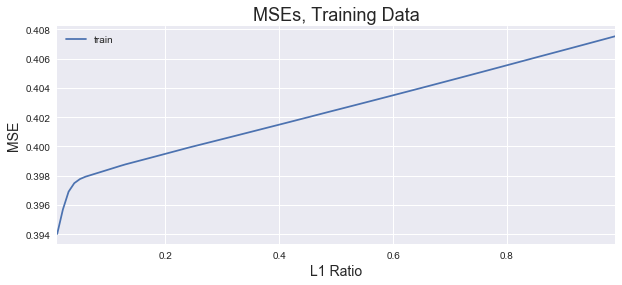

In [29]:
f, ax = plt.subplots(figsize = (10, 4))

ax.set_ylabel("MSE", fontsize = 14)
ax.set_xlabel("L1 Ratio", fontsize = 14)
ax.set_title("MSEs, Training Data", fontsize = 18)
table.plot.line("L1 Ratio", ["train"], ax = ax)
plt.show()

We do the same with the MSE of the model when predicting on the test set:

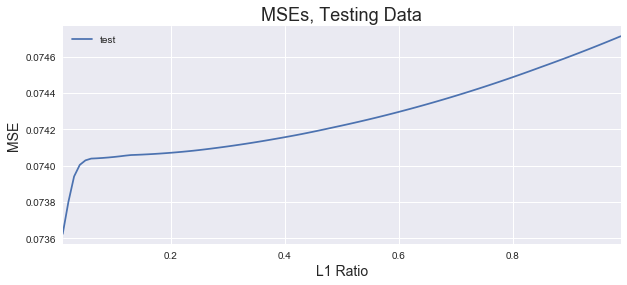

In [30]:
f, ax = plt.subplots(figsize = (10, 4))

ax.set_ylabel("MSE", fontsize = 14)
ax.set_xlabel("L1 Ratio", fontsize = 14)
ax.set_title("MSEs, Testing Data", fontsize = 18)
table.plot.line("L1 Ratio", ["test"], ax = ax)
plt.show()

We can see that for this particular model, the lowest Mean Squared Error is achieved when the l1_ratio is close to zero - that is, when this model uses a Ridge regression.  While LASSO is typically better, it appears that Ridge is most effective in minimizing MSE for both the training and testing data.  Elastic Net allows us to optimally estimate even in these less common scenarios.

### Logistic Model (Stochastic Gradient Descent Classifier)

We will now use the SciKit-Learn package "SGDClassifier", which will (at our specification), use a logarithmic loss function to perform the Elastic Net regularization on a logistic model.  Here, we predict either a 0 for someone who was not hospitalized or a 1 for someone who was, and evaluate our model with several different metrics.

We use a grid search to test different combinations of hyperparameters by cycling through each possible combination.  We also employ 5-fold cross validation, in which each set of tuning parameters is trained on 80% of the data and tested on the last 20% (1/5th of the data) in 5 iterations to find the parameters that perform best in predicting these small "test sets".

We report several metrics used in identifying the best model.  Remember that these algorithms only use the training data in fitting the model, so a good training score may be more indicative of overfitting than predictive power.  We report the following metrics:

* Accuracy is one important metric that is commonly used in classification problems - it allows us to see how many of the total number of predictions we got right.  We report accuracy for both the training and testing datasets.

* As before, we will report MSE for both the training and testing dataset.  As opposed to accuracy, which we try to maximize, we will minimize MSE in our modeling.

* We include a confusion matrix for the testing data.  The upper right corner indicates everyone who the model correctly predicted would not be hospitalized, while the bottom right contains the number of people who were predicted to have been safe who were in fact hospitalized.  The left side of the matrix contains those who were predicted to have been hospitalized and who were not in the upper cell, while the lower left-hand corner contains the number of correct predictions of hospitalization.

The best parameters, as determined by the model, are likewise reported.



In [71]:
# Setting up the model
logreg = LogisticRegression()
gridsearch = GridSearchCV(logreg, {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 2, 5]}, cv=5)

# Fitting the model, and results
gridsearch.fit(Xs_train_sub, y_train_sub)
print("Training Accuracy: ")
print(gridsearch.score(Xs_train_sub, y_train_sub))
print("")
print("Testing Accuracy: ")
print(gridsearch.score(Xs_test, y_test_b))

# Best parameters report
print("")
print("The best parameters are: ")
print(gridsearch.best_params_)
print("")

# Prediction
train_predictions = gridsearch.predict(Xs_train_sub)
test_predictions = gridsearch.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_sub, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, test_predictions))

Training Accuracy: 
0.699554423934

Testing Accuracy: 
0.582602414611

The best parameters are: 
{'C': 0.1, 'penalty': 'l1'}

Train MSE: 0.30044557606619987
Test MSE: 0.4173975853885048

Confusion Matrix:
[[4998 3884]
 [ 161  648]]


In [72]:
# Setting up the model
enlog = SGDClassifier(max_iter = 5, loss = "log", penalty = "elasticnet")
gridsearch = GridSearchCV(enlog, {'l1_ratio': [0.1, .5, .7, .9, .95, .99, 1], 'alpha': [0.1, 1, 2, 5]}, cv=5)

# Fitting the model, and results
gridsearch.fit(Xs_train_sub, y_train_sub)
print("Training Accuracy: ")
print(gridsearch.score(Xs_train_sub, y_train_sub))
print("")
print("Testing Accuracy: ")
print(gridsearch.score(Xs_test, y_test_b))

# Best parameters report
print("")
print("The best parameters are: ")
print(gridsearch.best_params_)
print("")

# Prediction
train_predictions = gridsearch.predict(Xs_train_sub)
test_predictions = gridsearch.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_sub, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, test_predictions))

Training Accuracy: 
0.641947803947

Testing Accuracy: 
0.73728201424

The best parameters are: 
{'alpha': 0.1, 'l1_ratio': 0.9}

Train MSE: 0.3580521960534691
Test MSE: 0.2627179857599835

Confusion Matrix:
[[6723 2159]
 [ 387  422]]


Note that the Elastic Net chose an l1_ratio of 0.9, which includes penalties from both the LASSO and Ridge models. It is more heavily weighted toward the LASSO penalty, but as we can see from the logistic model above (which chose a pure LASSO penalty over the Ridge model), it performs better on the testing dataset.  The Elastic Net testing accuracy is 0.73, compared to the logistic model's 0.58, and also has a lower testing MSE.

As expected, the logistic model had a higher training accuracy, but this is indicative of over-fitting in that model (as can be verified through the lower testing accuracy).

Examining the confusion matrices, we can see that the Elastic Net correctly predicted that a small percent of the population would be hospitalized.  It is interesting to note that the logistic model correctly predicted a higher number of people who were hospitalized (which may be of interest in some situations), although it did this by falsely predicting that more people would be hospitalized in total.

#### Additional Comparisons

We'll now examine our model with each penalty imposed separately, using the SGDClassifier function for each model.  We restrict each model to have an alpha value of 1, which we found to be a reasonable parameter by experimenting with the model.  In doing this, we can compare each regularization's performance in this setting.

In [76]:
# Setting up the model
enlog = SGDClassifier(max_iter = 5, loss = "log", penalty = "l1")
gridsearch = GridSearchCV(enlog, {'alpha': [1]}, cv=5)

# Fitting the model, and results
gridsearch.fit(Xs_train_sub, y_train_sub)
print("Training Accuracy: ")
print(gridsearch.score(Xs_train_sub, y_train_sub))

print("")
print("Testing Accuracy: ")
print(gridsearch.score(Xs_test, y_test_b))

print("")
print("The best parameters are: ")
print(gridsearch.best_params_)
print("")

# Prediction
train_predictions = gridsearch.predict(Xs_train_sub)
test_predictions = gridsearch.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_sub, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, test_predictions))

Training Accuracy: 
0.5

Testing Accuracy: 
0.0834795170777

The best parameters are: 
{'alpha': 1}

Train MSE: 0.5
Test MSE: 0.916520482922299

Confusion Matrix:
[[   0 8882]
 [   0  809]]


Using a LASSO penalty, this model has "chosen" to predict that everybody would be hospitalized.  Given that the testing set has many fewer hospitalizations than the training set, this yields an incredibly low accuracy for the testing set - only 8.35% of the predictions were correct.

In [77]:
# Setting up the model
enlog = SGDClassifier(max_iter = 5, loss = "log", penalty = "l2")
gridsearch = GridSearchCV(enlog, {'alpha': [1]}, cv=5)

# Fitting the model, and results
gridsearch.fit(Xs_train_sub, y_train_sub)
print("Training Accuracy: ")
print(gridsearch.score(Xs_train_sub, y_train_sub))

print("")
print("Testing Accuracy: ")
print(gridsearch.score(Xs_test, y_test_b))

print("")
print("The best parameters are: ")
print(gridsearch.best_params_)
print("")

# Prediction
train_predictions = gridsearch.predict(Xs_train_sub)
test_predictions = gridsearch.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_sub, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, test_predictions))

Training Accuracy: 
0.656906429026

Testing Accuracy: 
0.702713858219

The best parameters are: 
{'alpha': 1}

Train MSE: 0.343093570973902
Test MSE: 0.29728614178103396

Confusion Matrix:
[[6298 2584]
 [ 297  512]]


We can see that the Ridge model has performed rather well - it has 70.27% accuracy, predicting a surprisingly large amount of even the hospitalized people (this is more difficult because they comprise less than 10% of the testing dataset).

We now run the Elastic Net model to see how it performs:

In [80]:
# Setting up the model
enlog = SGDClassifier(max_iter = 5, loss = "log", penalty = "elasticnet")
gridsearch = GridSearchCV(enlog, {'alpha': [1], 'l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}, cv=5)

# Fitting the model, and results
gridsearch.fit(Xs_train_sub, y_train_sub)
print("Training Accuracy: ")
print(gridsearch.score(Xs_train_sub, y_train_sub))

print("")
print("Testing Accuracy: ")
print(gridsearch.score(Xs_test, y_test_b))

print("")
print("The best parameters are: ")
print(gridsearch.best_params_)
print("")

# Prediction
train_predictions = gridsearch.predict(Xs_train_sub)
test_predictions = gridsearch.predict(Xs_test)

# Report
print("Train MSE: {}".format(MSE(y_train_sub, train_predictions)))
print("Test MSE: {}".format(MSE(y_test_b, test_predictions)))

print("")
print("Confusion Matrix:")
print(confusion_matrix(y_test_b, test_predictions))

Training Accuracy: 
0.643220878421

Testing Accuracy: 
0.709111546796

The best parameters are: 
{'alpha': 1, 'l1_ratio': 0.05}

Train MSE: 0.35677912157861236
Test MSE: 0.2908884532040037

Confusion Matrix:
[[6418 2464]
 [ 355  454]]


We can see that the Elastic Net model outperformed both the Ridge and LASSO regression, setting the l1_ratio equal to 0.05 - closer to Ridge regularization, but not pure Ridge.  The training accuracy was higher for the Ridge regression, but the testing accuracy for LASSO was marginally higher - 70.91% as opposed to 70.27%.  It appears that including a small amount of LASSO regularization is beneficial, as suggested by previous modeling and the theory behind this model.

# Conclusion
We have reviewed the predictive power of Elastic Net by discussing the situations in which it can be used, the flexibility of its cost function, and the differences between naive Elastic Net and the rescaled coefficients of Elastic Net. Indeed, Elastic Net optimizes the benefits from Ridge and LASSO regressions while minimizing their potential weaknesses. Thus, Elastic Net can reduce overfitting to a level that Ridge or LASSO may not be able to reach.

One of the main points of this project was to demonstrate the flexibility of Elastic Net regression, thanks to a flexible cost function that utilizes both the L1 and L2 norms. As is previously stated, Elastic Net can perform Ridge or LASSO regressions, or any combination of both. Hence, Elastic Net allows for flexibility in prediction and consistently does just as well as, if not better than, Ridge or LASSO for out-of-sample prediction. Our results demonstrate these findings through the use of Monte Carlo simulation as well as linear probability and logistic Elastic Net regression on empirical data.
